In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
import matplotlib.pyplot as plt

In [5]:
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
input_dim=28
input_neurons=784
hidden_neurons=500



In [7]:
x=tf.placeholder(float,[None,input_neurons],name="input_x")

In [8]:
weight_encode=tf.Variable(tf.random_normal([input_neurons,hidden_neurons]))
bias_encode=tf.Variable(tf.zeros([hidden_neurons]))

In [9]:
weight_decode=tf.transpose(weight_encode)
bias_decode=tf.Variable(tf.zeros([input_neurons]))

In [10]:
noised_input=x
autoencoded_output=tf.nn.sigmoid(tf.matmul(noised_input,weight_encode)+bias_encode)
decoded_output=tf.nn.sigmoid(tf.matmul(autoencoded_output,weight_decode))+bias_decode


In [11]:
loss=tf.reduce_mean(0.5*tf.pow(x-decoded_output,2))

In [12]:
optim=tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [13]:
x_test,y_test=mnist.test.images,mnist.test.labels

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(40000):
        x_train,y_train=mnist.train.next_batch(128)
        res,_=sess.run([loss,optim],feed_dict={x:x_train,})
        if i%1000==0:
            print(res)
        
    
            
    
    k=sess.run(decoded_output,feed_dict={x:x_test,})
    print("Test Loss",sess.run(loss,feed_dict={x:x_test,}))
        
        
        

0.2104225
0.19224249
0.17400059
0.15861322
0.14719589
0.13460399
0.12624308
0.116539754
0.10900058
0.10317061
0.097956836
0.09295641
0.088590525
0.08475402
0.08202258
0.07841825
0.07685149
0.07420434
0.07281542
0.07060198
0.06889471
0.06792624
0.06661069
0.06483811
0.06473945
0.063723855
0.062768966
0.062018305
0.061857313
0.060911212
0.059954505
0.059811864
0.060436692
0.059080873
0.058111552
0.057992347
0.05918207
0.058265064
0.057070524
0.05796738
Test Loss 0.056673728


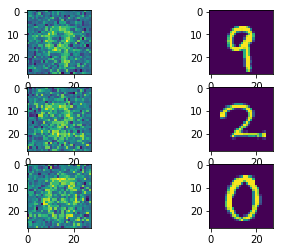

In [17]:
#lets check another time
f,ax=plt.subplots(3,2)
ax[0,0].imshow(k[113].reshape(28,28))
ax[0,1].imshow(x_test[113].reshape(28,28))
ax[1,0].imshow(k[77].reshape(28,28))
ax[1,1].imshow(x_test[77].reshape(28,28))
ax[2,0].imshow(k[13].reshape(28,28))
ax[2,1].imshow(x_test[13].reshape(28,28))

